# オペレーティングシステム 演習 6
# ページ置換アルゴリズムの観察 可視化ページ

* オペレーティングシステム 演習 6 ページ置換アルゴリズムの観察 の出力を可視化する

* まず以下を実行せよ

In [1]:
%matplotlib notebook
import math,sys,time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# change this value to change animation speed
# 1.0 means animation runs as fast as the real execution.
# smaller value means slower animation
animation_speed = 0.5

def decode_run_length(X, last_accessed_page):
    # X : list of integers that encode bitmaps. e.g.,
    # if the original data was 000110000111
    # X = [3, 2, 4, 3]
    # decode X into the bitmap of 1/0s
    n_bits = sum(X)
    # make a rectangle of roughly n_bits pixels
    #rows = int(math.sqrt(n_bits))
    #cols = (n_bits + rows - 1) // rows
    cols = 256
    rows = (n_bits + cols - 1) // cols
    assert(rows * cols >= n_bits), (n_bits, rows, cols)
    # bitmap of all pages
    img = np.zeros((rows * cols), dtype=np.float)
    c = 0
    i = 0
    for x in X:
        img[i:i+x] = c
        c = 1 - c
        i += x
    img[i:] = 2
    img2 = img.reshape((rows, cols))
    i,j = (last_accessed_page // cols, last_accessed_page % cols)
    r = 3
    img2[max(0,i-r):min(rows,i+r),max(0,j-r):min(cols,j+r)] = 3
    return img2

def generate_images(filename):
    fp = open(filename)
    im = None
    # animation time. incremented whenever
    # update gets called
    t0 = time.time()
    t = record_time = 0.0
    while 1:
        # print "t = %f, record_time = %f" % (t, record_time)
        line = fp.readline()
        if line == "": break
        line_split = line.split()
        # time when the record was taken
        record_time = float(line_split[0])
        if animation_speed * t >= record_time: 
            # animation is behind, skip
            continue
        # idx of the last accessed page
        last_accessed_page = int(line_split[1])
        # run length encoding of in/out pages
        X = [ int(x) for x in line_split[2:] ]
        img = decode_run_length(X, last_accessed_page)
        rows,cols = img.shape
        if im is None:
            plt.xticks([])
            im = plt.imshow(img, extent=[0,cols,rows,0], aspect=1)
        else:
            im.set_data(img)
        while animation_speed * t < record_time:
            yield im,
            t = time.time() - t0
    im.set_data(img * 0.5)
    yield im,

def visualize_incore(filename):
    fig = plt.figure()
    ani = animation.FuncAnimation(fig, lambda x: x, repeat=0,
                                  frames=generate_images(filename),
                                  interval=30)
    plt.show()
    return ani

## 常駐メモリの記録(record_incore_1の出力)の可視化

199MBの領域を3回アクセス

<IPython.core.display.Javascript object>


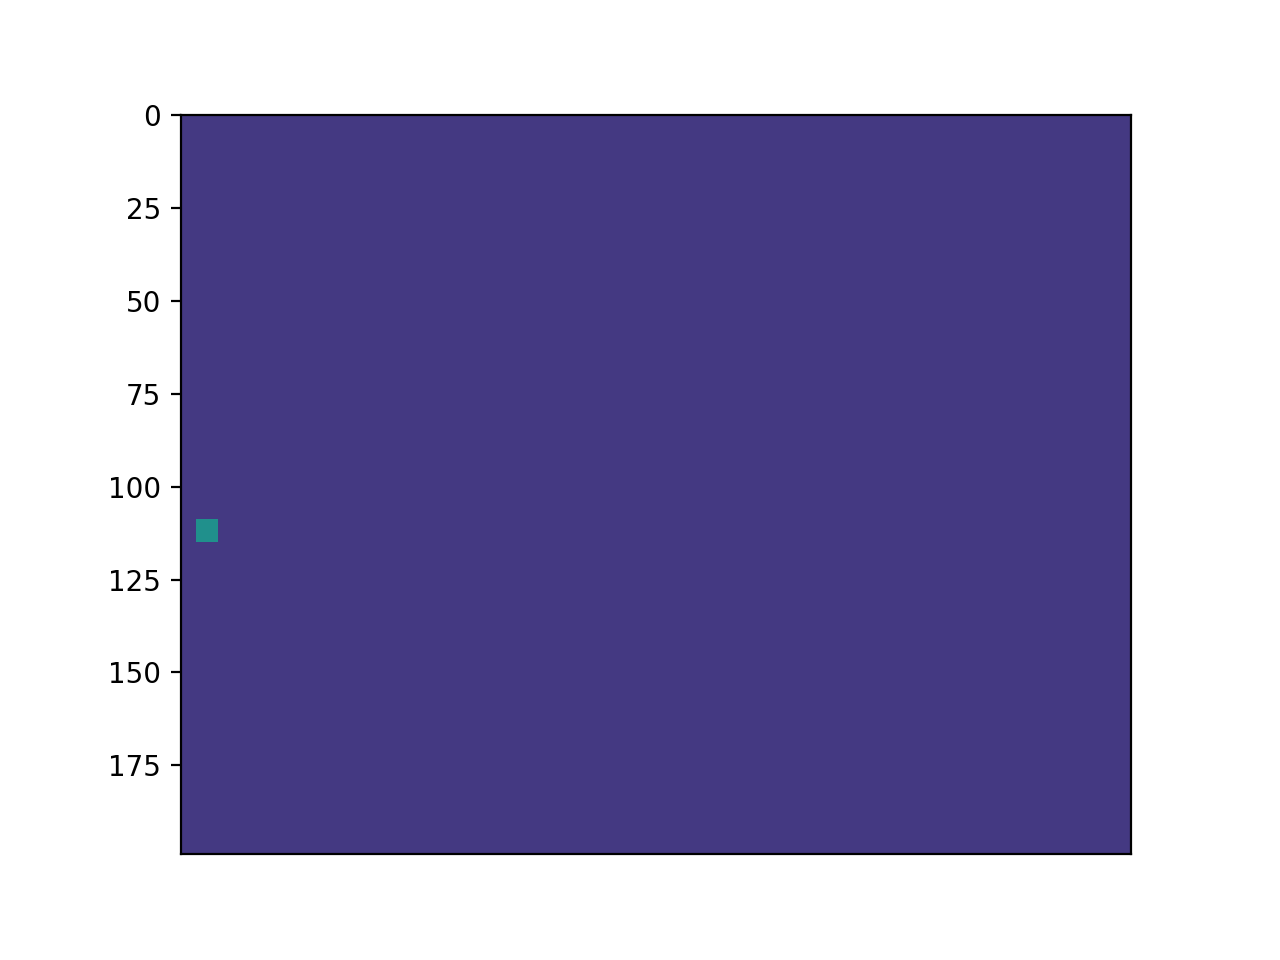

In [2]:
visualize_incore("incore199x3.log")

293MBの領域を3回アクセス

<IPython.core.display.Javascript object>


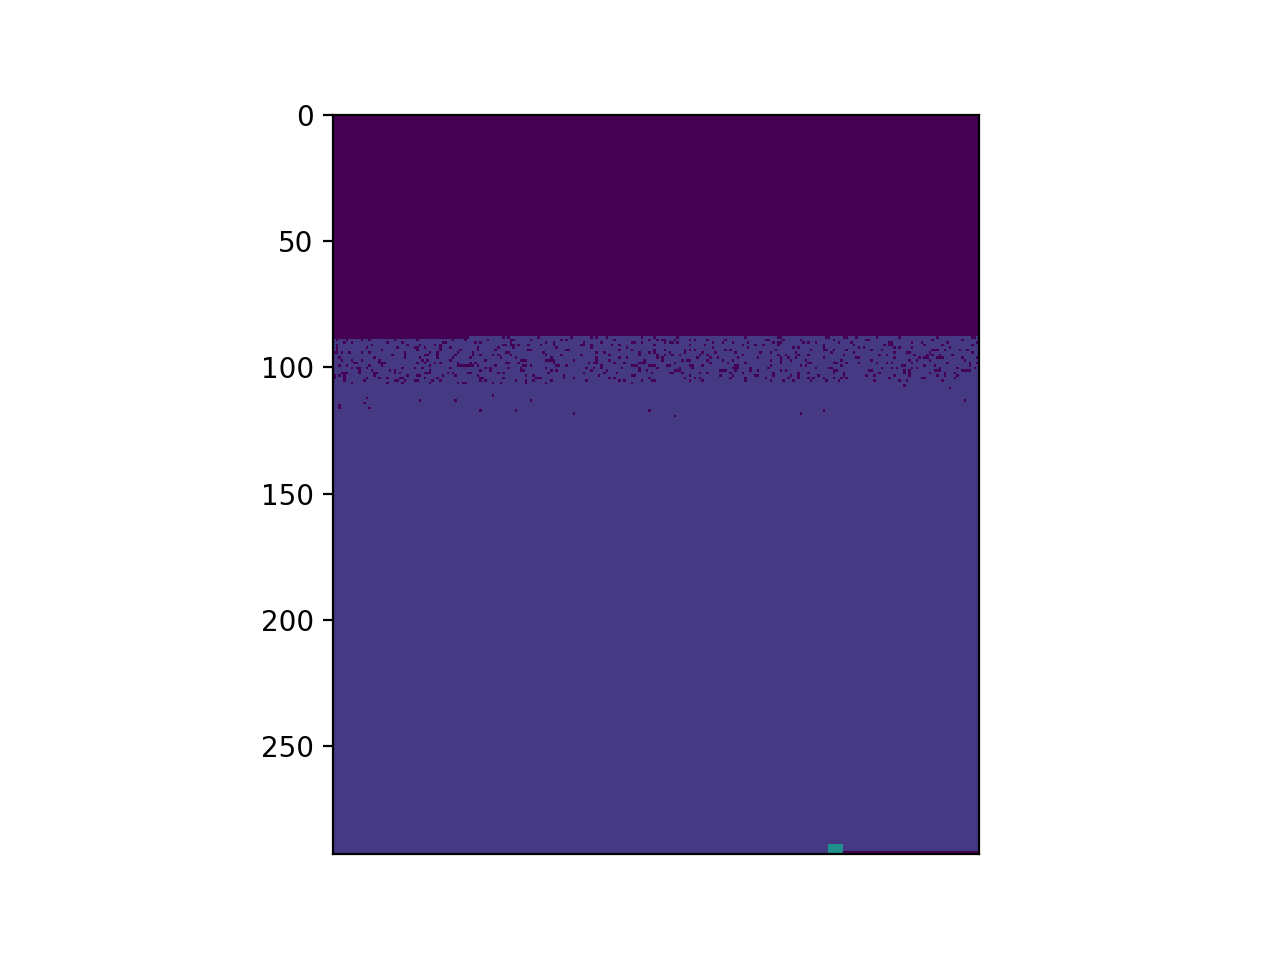

In [3]:
visualize_incore("incore293x3.log")

## 演習 6-1 の可視化

199MBを5ページ飛ばしで

<IPython.core.display.Javascript object>


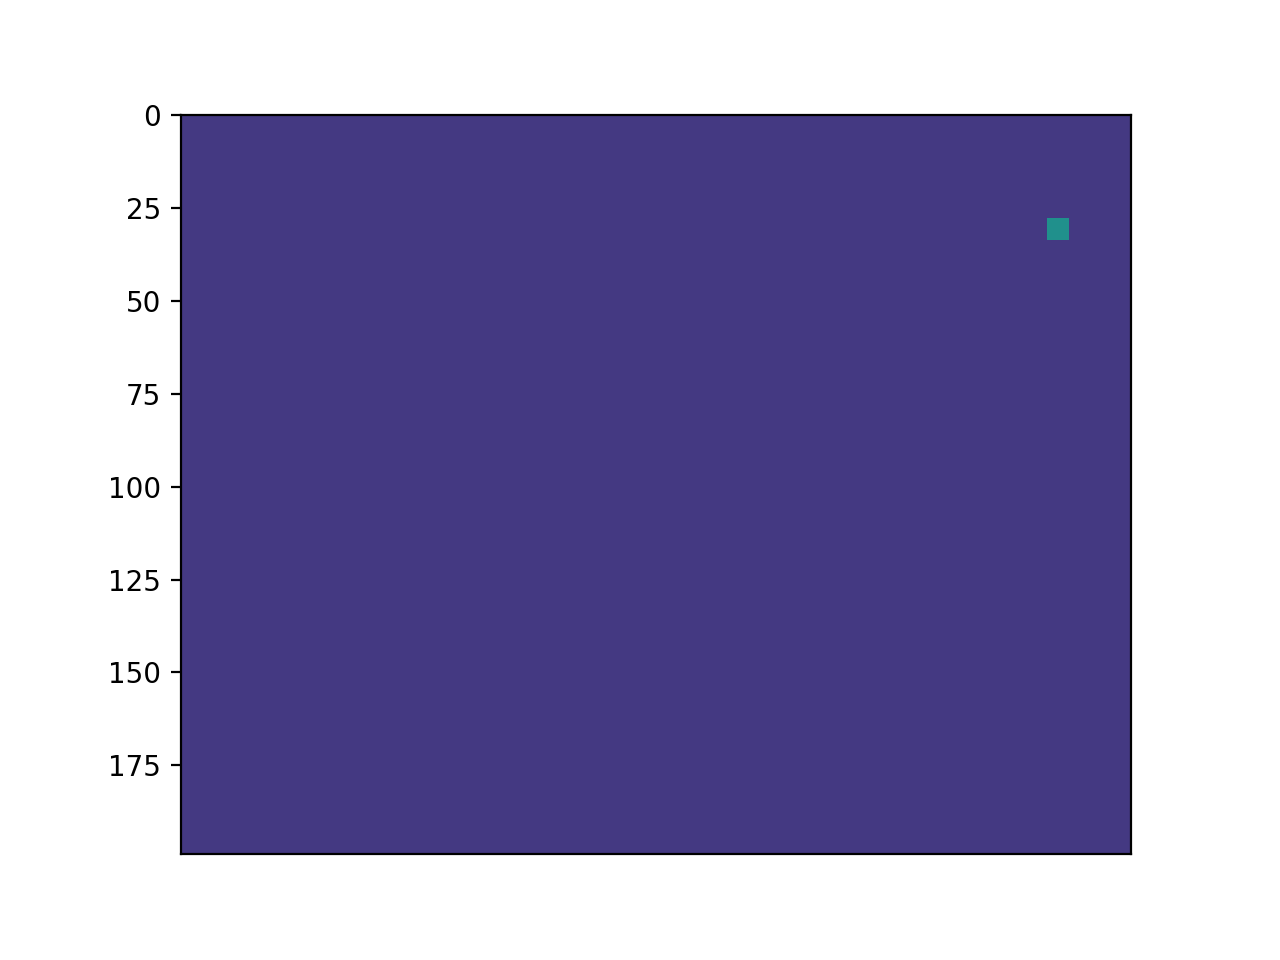

In [4]:
visualize_incore("incore199_5x3.log")

293MBを5ページ飛ばしで

<IPython.core.display.Javascript object>


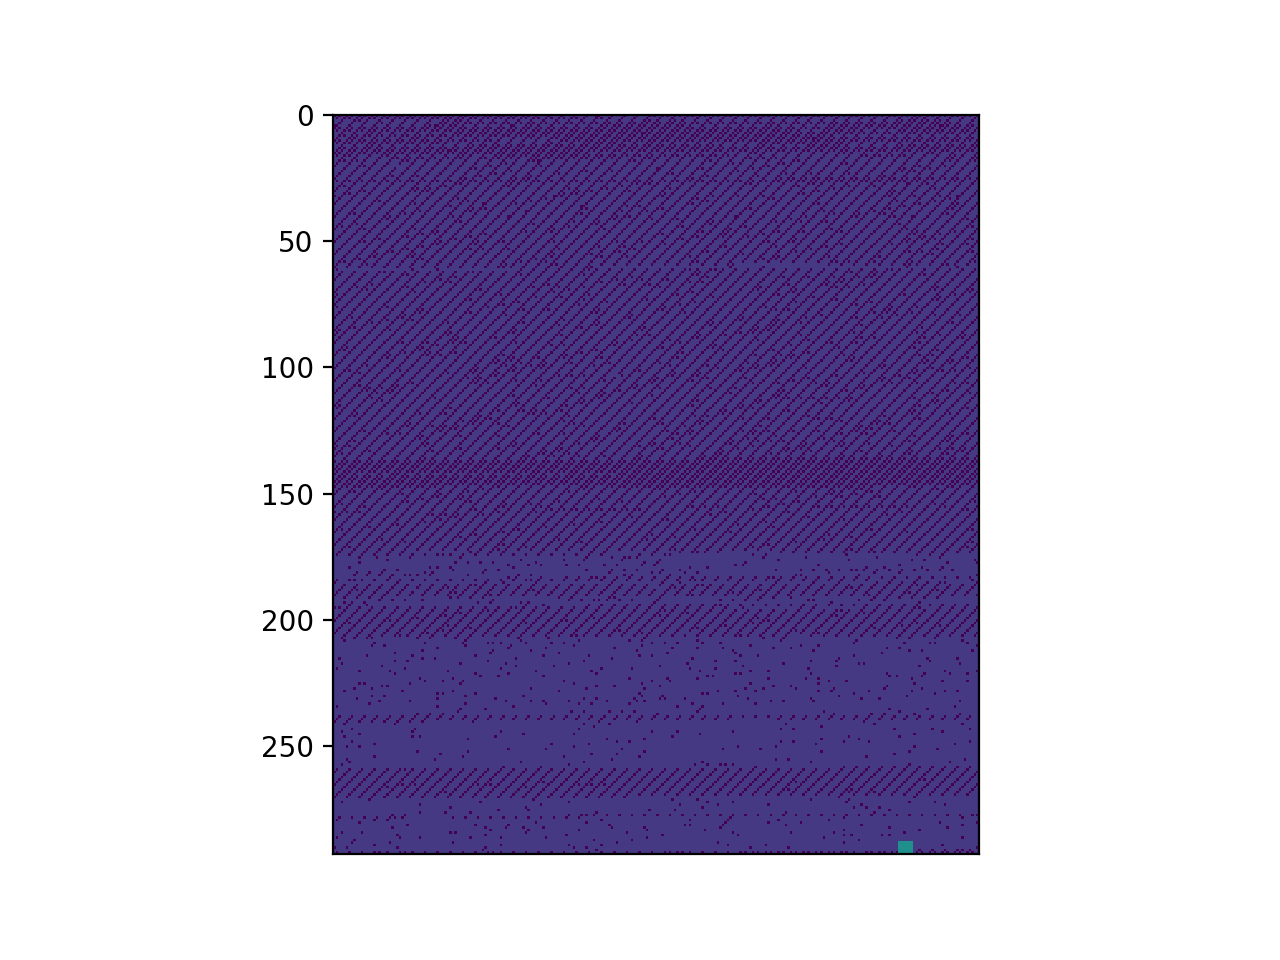

In [5]:
visualize_incore("incore293_5x3.log")

295MBを5ページ飛ばしで

<IPython.core.display.Javascript object>


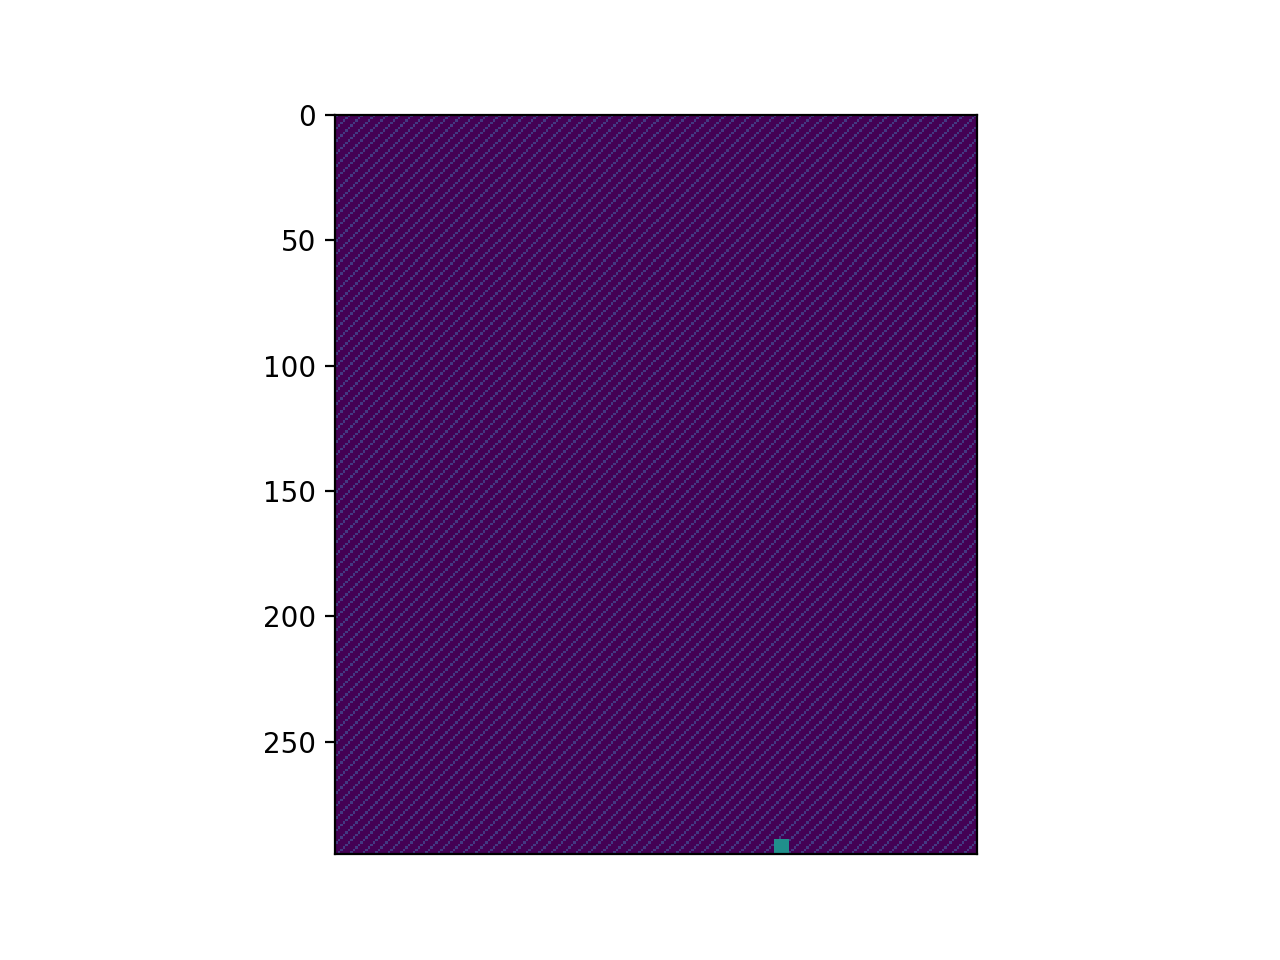

In [6]:
visualize_incore("incore295_5x3.log")